In [230]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt


In [231]:
df=pd.read_csv('dataset.csv')
df

,Aspect Ratio,Audio Jack,Bezel-less display,Brand,Capacity,Fingerprint Sensor,Image Resolution,Loudspeaker,Operating System,Rating Count,Review Count,Screen to Body Ratio (calculated),USB OTG Support,User Replaceable,VoLTE,Rating
0,19:9,3.5 mm,yes,Xiaomi,4000 mAh,yes,4000 x 3000 Pixels,yes,Android v8.1 (Oreo),172274,17138,80.68 %,yes,No,yes,4.5
1,19:9,3.5 mm,yes,Realme,4230 mAh,yes,4128 x 3096 Pixels,yes,Android v8.1 (Oreo),339447,38252,80.85 %,yes,No,yes,4.5
2,19.5:9,3.5 mm,yes,Realme,3500 mAh,yes,4128 x 3096 Pixels,yes,Android v8.1 (Oreo),1149,1151,83.68 %,yes,No,yes,4.4
3,18.5:9,3.5 mm,yes,Samsung,3300 mAh,yes,5288 x 3968 Pixels,yes,Android v8.0 (Oreo),6026,779,74.78 %,yes,No,yes,4.3
4,19.5:9,3.5 mm,yes,Honor,3750 mAh,yes,5160 x 3872 Pixels,yes,Android v8.1 (Oreo),5175,5177,84.23 %,yes,No,yes,4.4
5,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4019,809,NaN,NaN,NaN,NaN,4.4
6,19.5:9,3.5 mm,yes,Vivo,3400 mAh,yes,4000 x 3000 Pixels,yes,Android v8.1 (Oreo),19350,4178,84.98 %,yes,No,yes,4.5
7,18:9,3.5 mm,NaN,Xiaomi,3000 mAh,No,4128 x 3096 Pixels,yes,Android v8.1 (Oreo),7525,5543,72.68 %,yes,No,yes,4.3
8,19:9,3.5 mm,yes,Xiaomi,4000 mAh,yes,4000 x 3000 Pixels,yes,Android v8.1 (Oreo),15725,15649,79.24 %,yes,No,yes,4.1
9,19:9,3.5 mm,yes,OPPO,4230 mAh,No,4128 x 3096 Pixels,yes,Android v8.1 (Oreo),4414,905,80.85 %,yes,No,yes,4.3


Explanation of below line:-
All NaN values are replaced with a spacebar.This is done because to counter error due to label encoding of missing values.Thus all NaN values of the the dataset are replaced.


In [232]:
for i in df.columns:
    df[i].fillna(" ", inplace = True)

In [233]:
rf=RandomForestClassifier(n_estimators=100)

Explanation of below line:- Of various columns present, I took 15 columns that I thought would contribute to final outcome.Other columns are dropped.Tried picking up more columns but there was no significant increase in accuracy 

In [234]:
x=df[df.columns[:-1]]
x

,Aspect Ratio,Audio Jack,Bezel-less display,Brand,Capacity,Fingerprint Sensor,Image Resolution,Loudspeaker,Operating System,Rating Count,Review Count,Screen to Body Ratio (calculated),USB OTG Support,User Replaceable,VoLTE
0,19:9,3.5 mm,yes,Xiaomi,4000 mAh,yes,4000 x 3000 Pixels,yes,Android v8.1 (Oreo),172274,17138,80.68 %,yes,No,yes
1,19:9,3.5 mm,yes,Realme,4230 mAh,yes,4128 x 3096 Pixels,yes,Android v8.1 (Oreo),339447,38252,80.85 %,yes,No,yes
2,19.5:9,3.5 mm,yes,Realme,3500 mAh,yes,4128 x 3096 Pixels,yes,Android v8.1 (Oreo),1149,1151,83.68 %,yes,No,yes
3,18.5:9,3.5 mm,yes,Samsung,3300 mAh,yes,5288 x 3968 Pixels,yes,Android v8.0 (Oreo),6026,779,74.78 %,yes,No,yes
4,19.5:9,3.5 mm,yes,Honor,3750 mAh,yes,5160 x 3872 Pixels,yes,Android v8.1 (Oreo),5175,5177,84.23 %,yes,No,yes
5,,,,,,,,,,4019,809,,,,
6,19.5:9,3.5 mm,yes,Vivo,3400 mAh,yes,4000 x 3000 Pixels,yes,Android v8.1 (Oreo),19350,4178,84.98 %,yes,No,yes
7,18:9,3.5 mm,,Xiaomi,3000 mAh,No,4128 x 3096 Pixels,yes,Android v8.1 (Oreo),7525,5543,72.68 %,yes,No,yes
8,19:9,3.5 mm,yes,Xiaomi,4000 mAh,yes,4000 x 3000 Pixels,yes,Android v8.1 (Oreo),15725,15649,79.24 %,yes,No,yes
9,19:9,3.5 mm,yes,OPPO,4230 mAh,No,4128 x 3096 Pixels,yes,Android v8.1 (Oreo),4414,905,80.85 %,yes,No,yes


Explanation of below line:- Label Encoding was done to convert strings to integer.Thus all features(columns) have been encoded as shown below.

In [235]:
x=x.apply(LabelEncoder().fit_transform)
x

,Aspect Ratio,Audio Jack,Bezel-less display,Brand,Capacity,Fingerprint Sensor,Image Resolution,Loudspeaker,Operating System,Rating Count,Review Count,Screen to Body Ratio (calculated),USB OTG Support,User Replaceable,VoLTE
0,7,1,1,45,76,2,6,1,16,312,286,216,2,1,1
1,7,1,1,37,83,2,10,1,16,323,304,219,2,1,1
2,6,1,1,37,68,2,10,1,16,93,153,238,2,1,1
3,2,1,1,39,61,2,18,1,15,188,124,162,2,1,1
4,6,1,1,10,74,2,17,1,16,176,239,243,2,1,1
5,0,0,0,0,0,0,0,0,0,162,129,0,0,0,0
6,6,1,1,44,64,2,6,1,16,258,230,249,2,1,1
7,4,1,0,45,47,1,10,1,16,209,245,136,2,1,1
8,7,1,1,45,76,2,6,1,16,238,278,208,2,1,1
9,7,1,1,32,83,1,10,1,16,168,141,219,2,1,1


In [236]:
y=df.iloc[:,-1:].values

Explanation of below line:- For like/dislike, I chose 3.9 as the threshold rating parameter,above which the user likes the mobile phone.Below 3.9 rating, user dislikes the phone.

In [237]:
for i in range(len(y)):
    if y[i]<3.9:
        y[i]=0
    else:
        y[i]=1

In [238]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [239]:
rf.fit(xtrain,ytrain)

/home/atharvas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [240]:
a=accuracy_score(ytest,rf.predict(xtest))
b=accuracy_score(ytrain,rf.predict(xtrain))
a,b

(0.8028169014084507, 1.0)

Maximum achieved Accuracy=0.84

In [241]:
confusion_matrix(ytest,rf.predict(xtest))

array([[ 6, 11],
       [ 3, 51]])

In [242]:
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.67      0.35      0.46        17
         1.0       0.82      0.94      0.88        54

   micro avg       0.80      0.80      0.80        71
   macro avg       0.74      0.65      0.67        71
weighted avg       0.79      0.80      0.78        71



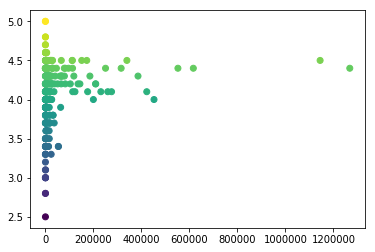

In [243]:
label=df['Rating']
plt.scatter(df['Rating Count'],df['Rating'],c=label)
plt.show()

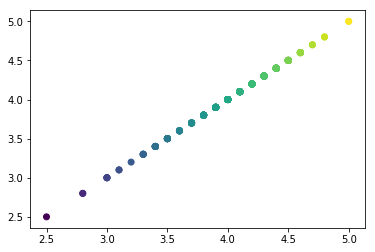

In [244]:
label=df['Rating']
plt.scatter(df['Rating'],df['Rating'],c=label)
plt.show()